In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Import Training data
Evals = {}

Names = ['EvalLSTURIni', 'EvaluationTranformerIniNone', 'EvaluationTranformerOwnIniNone']
Keys = ['LSTUR', 'TransformerIni', 'TransformerIniOwn']
for name,key in zip(Names,Keys):
    filestr = f'TestSmall/{name}.pkl'
    with open(filestr, 'rb') as f:
        file = pickle.load(f)
        Evals[key] = file if type(file) == dict else file[0]





In [2]:
Evals['LSTUR'].keys()

dict_keys(['AUC', 'MRR', 'NDCG5', 'NDCG10', 'loss_vali', 'Loss_training'])

In [3]:
# Get End Scores for each model
EndScores = {'AUC':{}, 'MRR':{}, 'NDCG5':{}, 'NDCG10':{} }#, 'loss_vali':{}}

# Get AUC, MRR, NDCG5, NDCG10, loss_vali
for name in Keys:
    print(name)
    # Get last value of each metric
    EndScores['AUC'][name] = Evals[name]['AUC'][-1]
    EndScores['MRR'][name] = Evals[name]['MRR'][-1]
    EndScores['NDCG5'][name] = Evals[name]['NDCG5'][-1]
    EndScores['NDCG10'][name] = Evals[name]['NDCG10'][-1]
    #EndScores['loss_vali'][name] = Evals[name]['loss_vali'][-1]


LSTUR
TransformerIni
TransformerIniOwn


/var/folders/ky/9z234gb159s813shh1gxh2yw0000gn/T/ipykernel_29632/3641523056.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx].set_xticklabels(['LSTUR-Ini','CTNR-Ini','CTNR-IniLarge'])


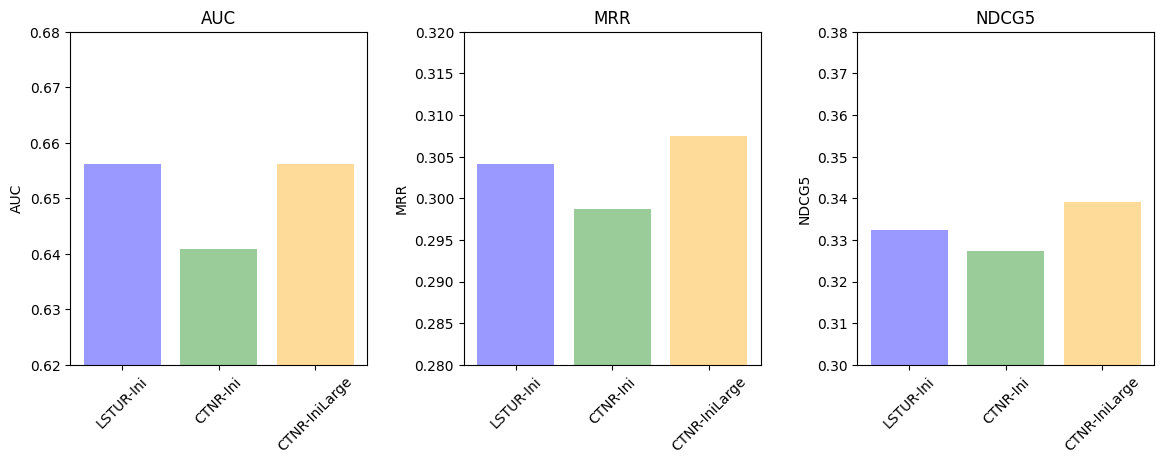

In [11]:
# Make a Bar plot of the scores

# Make a dataframe
df = pd.DataFrame(EndScores)

# Make a bar plot
fig, ax  = plt.subplots(1,3,figsize=(12,5))

Metrics = ['AUC', 'MRR', 'NDCG5'] #, 'NDCG10']
Intervals = [[0.62,0.68],[0.28,0.32],[0.30,0.38]] #,[0.20,0.40]]

for idx,(metric,interval) in enumerate(zip(Metrics,Intervals)):

    # Plot AUC
    ax[idx].bar(df.index, df[metric], label=metric, color= ['blue','green', 'orange'])

    # set alpha value to 0.5 for all bars
    for i in range(len(df)):
        ax[idx].get_children()[i].set_alpha(0.4)

    # Angle the x-ticks
    ax[idx].tick_params(axis='x', rotation=45)

    # Set the x-axis tick labels
    ax[idx].set_xticklabels(['LSTUR-Ini','CTNR-Ini','CTNR-IniLarge'])

    # Set the y-axis limits
    ax[idx].set_ylim(interval)

    # Set the subtitle
    ax[idx].set_title(metric)

    # Set the y-axis label
    ax[idx].set_ylabel(metric)

fig.tight_layout(pad=2.0)




In [8]:
df

,AUC,MRR,NDCG5,NDCG10
LSTUR,0.6562,0.3041,0.3324,0.3987
TransformerIni,0.6408,0.2987,0.3273,0.3922
TransformerIniOwn,0.6561,0.3075,0.3391,0.4021


In [9]:
# Load Final Predictions
from TestData.MindDependencies.Metrics import cal_metric

with open('TestSmall/LSTURinismallPredictions.pkl', 'rb') as f:
    LSTUR_predictions = pickle.load(f)

# get the labels and predictions for known and unknown users

LSTUR_known_labels = []
LSTUR_known_preds = []

LSTUR_unknown_labels = []
LSTUR_unknown_preds = []

for idx in range(len(LSTUR_predictions['labels'])):
    pred = LSTUR_predictions['preds'][idx]
    label = LSTUR_predictions['labels'][idx]
    user_id = LSTUR_predictions['user ids'][idx]

    if user_id == 0:
        LSTUR_unknown_labels.append(label)
        LSTUR_unknown_preds.append(pred)
    else:
        LSTUR_known_labels.append(label)
        LSTUR_known_preds.append(pred)

# Get the metrics for known and unknown users

LSTUR_mectrics = cal_metric(LSTUR_predictions['labels'], LSTUR_predictions['preds'],metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

LSTUR_known_metrics = cal_metric(LSTUR_known_labels, LSTUR_known_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

LSTUR_unknown_metrics = cal_metric(LSTUR_unknown_labels, LSTUR_unknown_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

# print the metrics

print('LSTUR metrics: ', LSTUR_mectrics)

print('LSTUR known users metrics: ', LSTUR_known_metrics)

print('LSTUR unknown users metrics: ', LSTUR_unknown_metrics)


LSTUR metrics:  {'group_auc': 0.6562, 'mean_mrr': 0.3041, 'ndcg@5': 0.3324, 'ndcg@10': 0.3987}
LSTUR known users metrics:  {'group_auc': 0.643, 'mean_mrr': 0.2967, 'ndcg@5': 0.323, 'ndcg@10': 0.3889}
LSTUR unknown users metrics:  {'group_auc': 0.6581, 'mean_mrr': 0.3051, 'ndcg@5': 0.3337, 'ndcg@10': 0.4001}


In [10]:
# Get the predictions for the other models

with open('TestSmall/TransformerinismallPredictions.pkl', 'rb') as f:
    Transformer_predictions = pickle.load(f)

with open('TestSmall/TransformerOwninismallPredictions.pkl', 'rb') as f:
    TransformerOwn_predictions = pickle.load(f)

# get the labels and predictions for known and unknown users

Transformer_known_labels = []
Transformer_known_preds = []

Transformer_unknown_labels = []
Transformer_unknown_preds = []

for idx in range(len(Transformer_predictions['labels'])):
    pred = Transformer_predictions['preds'][idx]
    label = Transformer_predictions['labels'][idx]
    user_id = Transformer_predictions['user ids'][idx]

    if user_id == 0:
        Transformer_unknown_labels.append(label)
        Transformer_unknown_preds.append(pred)
    else:
        Transformer_known_labels.append(label)
        Transformer_known_preds.append(pred)

# Get the metrics for known and unknown users

Transformer_mectrics = cal_metric(Transformer_predictions['labels'], Transformer_predictions['preds'],metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

Transformer_known_metrics = cal_metric(Transformer_known_labels, Transformer_known_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

Transformer_unknown_metrics = cal_metric(Transformer_unknown_labels, Transformer_unknown_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

# print the metrics

print('Transformer metrics: ', Transformer_mectrics)

print('Transformer known users metrics: ', Transformer_known_metrics)

print('Transformer unknown users metrics: ', Transformer_unknown_metrics)


# get the labels and predictions for known and unknown users

TransformerOwn_known_labels = []
TransformerOwn_known_preds = []

TransformerOwn_unknown_labels = []
TransformerOwn_unknown_preds = []

for idx in range(len(TransformerOwn_predictions['labels'])):
    pred = TransformerOwn_predictions['preds'][idx]
    label = TransformerOwn_predictions['labels'][idx]
    user_id = TransformerOwn_predictions['user ids'][idx]

    if user_id == 0:
        TransformerOwn_unknown_labels.append(label)
        TransformerOwn_unknown_preds.append(pred)
    else:
        TransformerOwn_known_labels.append(label)
        TransformerOwn_known_preds.append(pred)

# Get the metrics for known and unknown users

TransformerOwn_mectrics = cal_metric(TransformerOwn_predictions['labels'], TransformerOwn_predictions['preds'],metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

TransformerOwn_known_metrics = cal_metric(TransformerOwn_known_labels, TransformerOwn_known_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

TransformerOwn_unknown_metrics = cal_metric(TransformerOwn_unknown_labels, TransformerOwn_unknown_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

# print the metrics

print('TransformerOwn metrics: ', TransformerOwn_mectrics)

print('TransformerOwn known users metrics: ', TransformerOwn_known_metrics)

print('TransformerOwn unknown users metrics: ', TransformerOwn_unknown_metrics)



Transformer metrics:  {'group_auc': 0.6408, 'mean_mrr': 0.2987, 'ndcg@5': 0.3273, 'ndcg@10': 0.3922}
Transformer known users metrics:  {'group_auc': 0.6392, 'mean_mrr': 0.2969, 'ndcg@5': 0.3249, 'ndcg@10': 0.39}
Transformer unknown users metrics:  {'group_auc': 0.641, 'mean_mrr': 0.299, 'ndcg@5': 0.3276, 'ndcg@10': 0.3925}
TransformerOwn metrics:  {'group_auc': 0.6561, 'mean_mrr': 0.3075, 'ndcg@5': 0.3391, 'ndcg@10': 0.4021}
TransformerOwn known users metrics:  {'group_auc': 0.6537, 'mean_mrr': 0.3051, 'ndcg@5': 0.3358, 'ndcg@10': 0.3988}
TransformerOwn unknown users metrics:  {'group_auc': 0.6564, 'mean_mrr': 0.3078, 'ndcg@5': 0.3396, 'ndcg@10': 0.4026}


In [14]:
len(TransformerOwn_predictions['labels'])

70938